# Exploratory Data Analysis of Electric Vehicle Population
**Domain:** Environmental & Transportation Analytics

---

## 1. Introduction & Problem Definition (Task 1)

### 1.1 Aim of the Project
The primary aim of this project is to conduct a comprehensive **Exploratory Data Analysis (EDA)** on a sample of the electric vehicle population data. This study seeks to identify and quantify key trends in EV adoption, technology preferences, and policy alignment across various geographical segments.

### 1.2 Problem Definition
The global transition to Electric Vehicles (EVs) is essential for mitigating the environmental impact of transportation, primarily by reducing Greenhouse Gas (GHG) emissions and improving urban air quality. However, EV adoption is not uniform; it varies significantly by location, technology type (Battery Electric Vehicles vs. Plug-in Hybrid Electric Vehicles), and the presence of government incentives.

### 1.3 Problem Statement
The heterogeneous and rapidly evolving nature of EV adoption presents a challenge for effective environmental policy and infrastructure planning. Local governments and utility providers require clear, data-driven insights into where adoption is succeeding, what vehicle types are preferred, and how key technological factors (like range) influence policy eligibility to support a sustainable and accelerated transition to electric mobility.

### 1.4 Objectives of the Study
To address the problem statement, the project is guided by the following five key objectives:

1.  **Geographic Concentration:** To rank and quantify the concentration of EV adoption across different Counties and Cities to identify high-adoption hubs.
2.  **Adoption Growth:** To analyze and visualize the historical rate of EV adoption based on the 'Model Year' to understand market momentum.
3.  **Technological Progress:** To assess the improvement and evolution of the median 'Electric Range' over time as an indicator of battery technology advancement.
4.  **Market Preference:** To determine the market share split between Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV) to understand consumer and manufacturer trends.
5.  **Policy Evaluation:** To examine the relationship between vehicle type, electric range, and CAFV (Clean Alternative Fuel Vehicle) Eligibility status to measure policy alignment.

---

## 2. Dataset Overview
To address the problem statement, we are utilizing a high-quality dataset containing information on the Electric Vehicle population.

* **Source:** Electric Vehicle Population Data (Washington State / Data.gov)
* **Dataset Size:** 2,000 records and 17 columns.
* **Data Variety:** The dataset includes a mix of:
    * **Categorical Data:** Make, Model, Country, City, Electric Vehicle Type.
    * **Numerical Data:** Model Year, Electric Range, Base MSRP.
    * **Geospatial/Policy Data:** Legislative District, Vehicle Location, and CAFV Eligibility.

---


## 3. Data Loading and Initial Overview
In this phase, we import the necessary Python libraries and load the dataset into a Pandas DataFrame. This step is crucial for understanding the structural integrity of the data, identifying the types of information available (numerical vs. categorical), and detecting any immediate anomalies like missing values or incorrect data types.

### 3.1 Importing Libraries
We utilize the following libraries for this analysis:
* **Pandas:** For data manipulation and structure.
* **NumPy:** For numerical operations.
* **Matplotlib & Seaborn:** For creating high-quality static visualizations.





In [2]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Verify imports
print("Libraries imported successfully!")

Libraries imported successfully!


---

### 3.2 Dataset Preview
To verify that the dataset has been loaded correctly from start to finish, we examine the first few and last few records. This helps ensure that the data structure is consistent and that there were no errors during the ingestion of the 2,000 records.

* **`head()`**: Displays the first 5 rows to understand the starting point of the data.
* **`tail()`**: Displays the last 5 rows to confirm the end of the dataset and check for any trailing null or corrupted rows.

In [3]:
from google.colab import files
files_to_load=files.upload()

Saving Electric Vehicle Population Data.xlsx to Electric Vehicle Population Data.xlsx


In [4]:
# Load the dataset
df = pd.read_excel("Electric Vehicle Population Data.xlsx")

# Displaying a success message
print(f"Successfully loaded the dataset with {df.shape[0]} rows and {df.shape[1]} columns.")

Successfully loaded the dataset with 2000 rows and 17 columns.


In [5]:
# Display first 10 rows
print("First 10 Rows of the Dataset:")
df.head(10)

First 10 Rows of the Dataset:


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
1,WP0AB2Y16L,King,Auburn,WA,98092.0,2020,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,203,0,47.0,277717723,POINT (-122.18497 47.28825),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98109.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,36.0,475865722,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJYGDEF5L,King,Seattle,WA,98125.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,46.0,108837249,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,5YJXCBE22J,Thurston,Olympia,WA,98501.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,259851259,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
5,1G1FZ6S00L,Thurston,Olympia,WA,98506.0,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259,0,22.0,255186389,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
6,5YJ3E1EA0N,Yakima,Moxee,WA,98936.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,211877725,POINT (-120.39197 46.55621),PACIFICORP,5.307700e+10
7,5YJSA1E29J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,23.0,112582634,POINT (-122.521 47.62732),PUGET SOUND ENERGY INC,5.303509e+10
8,JN1AZ0CPXB,Thurston,Olympia,WA,98512.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,35.0,144417262,POINT (-122.90787 46.9461),PUGET SOUND ENERGY INC,5.306701e+10
9,KNDCM3LD1J,King,Seattle,WA,98103.0,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,36.0,333286894,POINT (-122.35436 47.67596),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [6]:
## Display last 10 rows
print("Last 10 Rows of the Dataset:")
df.tail(10)

Last 10 Rows of the Dataset:


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1990,7FCTGAAA5P,King,Bellevue,WA,98004.0,2023,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41.0,241389774,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1991,5YJ3E1EA8P,King,Kirkland,WA,98034.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,238681824,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1992,1G1FZ6S0XP,Thurston,Olympia,WA,98501.0,2023,CHEVROLET,BOLT EUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,229662275,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
1993,JTDKARFP4J,King,Kirkland,WA,98033.0,2018,TOYOTA,PRIUS PRIME (PHEV),Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,48.0,310206585,POINT (-122.2066 47.67887),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1994,7SAYGDEE3R,Clark,Vancouver,WA,98662.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,17.0,264270730,POINT (-122.57722 45.64251),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
1995,7SAYGDEF4R,King,Shoreline,WA,98133.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,32.0,264592898,POINT (-122.34477 47.75744),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
1996,KNDC34LA9N,Clark,Vancouver,WA,98686.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,49.0,278991107,POINT (-122.62731 45.71668),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
1997,WBY8P8C58K,Thurston,Yelm,WA,98597.0,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126,0,2.0,152371607,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10
1998,7PDSGBBAXS,King,Kirkland,WA,98034.0,2025,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,280412268,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1999,KM8K23AG6N,King,Seattle,WA,98125.0,2022,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,46.0,282984432,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


---

### 3.3 Dataset Inspection
Once the data is loaded, we use the following commands to get a high-level overview:
* `.shape`: Confirms the dataset size (2,000 records and 17 columns).
* `.info()`: Provides a summary of non-null counts and identifies data types (object, int64, float64).
* `.describe()`: Displays descriptive statistics for numerical columns like 'Electric Range', helping us spot potential outliers or data entry errors.

In [7]:
# 1. Checking the shape of the data
print("Dataset Shape:", df.shape)

# 2. Getting a summary of columns, non-null counts, and data types
print("\nData Information")
df.info()

# 3. Generating statistical summaries for numerical columns
print("\nDescriptive Statistics")
display(df.describe())

Dataset Shape: (2000, 17)

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         2000 non-null   object 
 1   County                                             1998 non-null   object 
 2   City                                               1998 non-null   object 
 3   State                                              2000 non-null   object 
 4   Postal Code                                        1998 non-null   float64
 5   Model Year                                         2000 non-null   int64  
 6   Make                                               2000 non-null   object 
 7   Model                                              2000 non-null   object 
 8   Electric Vehicle Type                       

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,1998.000000,2000.00000,2000.00000,2000.000000,1998.000000,2.000000e+03,1.998000e+03
mean,98226.351351,2021.41300,54.79700,556.370000,32.144144,2.383268e+08,5.303611e+10
std,267.942706,3.25772,89.17563,6143.775239,14.845499,7.285463e+07,1.519680e+07
min,98001.000000,2010.00000,0.00000,0.000000,1.000000,1.470045e+06,5.300796e+10
25%,98033.000000,2019.00000,0.00000,0.000000,19.000000,2.055942e+08,5.303301e+10
50%,98112.000000,2023.00000,0.00000,0.000000,37.000000,2.582562e+08,5.303302e+10
75%,98359.000000,2024.00000,72.00000,0.000000,45.000000,2.746640e+08,5.303303e+10
max,99362.000000,2026.00000,337.00000,110950.000000,49.000000,4.788000e+08,5.307794e+10


* **`.info()`**: You will see that columns like Country and City have 1998 non-null values, while the total is 2000. This confirms there are 2 missing values to handle.

* **`.describe()`**: In Electric Range,Base MSRP columns a min of 0 tells us that for some vehicles, the range is not yet recorded or available.

---

## 4. Data Cleaning & Pre-processing (Task 2)
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. For this project, we focus on ensuring data integrity so that our visual insights are accurate and reliable.

### 4.1 Identification of Missing Values
The first step in pre-processing is to identify 'Null' or 'NaN' values. Missing data can lead to biased results or errors during the visualization phase. We use `.isnull().sum()` to calculate the number of missing entries per column and summarize them in a filtered table for better visibility.

In [8]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Create a DataFrame to display missing values information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    })

# Filter to show only columns with missing values
missing_info = missing_info[missing_info['Missing Values'] > 0]
display(missing_info)

,Missing Values
County,2
City,2
Postal Code,2
Legislative District,2
Vehicle Location,2
Electric Utility,2
2020 Census Tract,2


* **Observation:** The analysis identified 2 rows with missing values in the geographic and utility columns.

### 4.2 Handling of Missing Values
These 2 rows were removed using the dropna() function as they represent a negligible portion (0.1%) of the 2,000-record dataset.

In [9]:
# Drop rows with any missing values
df_cleaned = df.dropna().copy()

# Display the new shape of the DataFrame
print(f"DataFrame shape after dropping missing values: {df_cleaned.shape}")

DataFrame shape after dropping missing values: (1998, 17)


* **Result:** The dataset is now free from missing values.

---------

### 4.3 Identification and Handling of Duplicates
After addressing missing values, the next step in ensuring data quality is to check for redundant or repeated information that could skew our statistical results.

In [10]:
# Checking for duplicate rows in the dataset
duplicate_count = df.duplicated().sum()

print(f"Number of duplicate rows found: {duplicate_count}")

Number of duplicate rows found: 0


* **Observation:** The dataset was screened using the `duplicated().sum()` function to identify any identical rows across all 17 columns. A total of **0 duplicate rows** were found within the 2,000 records.
* **Result:** Since no duplicates exist, the dataset maintains a unique representation for every vehicle, ensuring that our adoption counts and market share analysis are precise.

---

### 4.4 Data Type Verification
The next step in the pre-processing phase is to verify that each column is assigned the correct data type. This ensures that numerical calculations and categorical plotting can be performed without errors.

In [11]:
# Checking the data types of each column
print("Column Data Types")
print(df.dtypes)

Column Data Types
VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 C

* **Observation:** Using the `dtypes` attribute, we confirmed that numerical features like 'Model Year' and 'Electric Range' are stored as integers/floats, while categorical features like 'Make' and 'City' are stored as objects.
No type conversion was necessary as the initial data ingestion correctly identified the schema.
* **Result:** The data structure is now validated for statistical analysis and visualization.



---



### 4.5 Column Renaming
To improve the readability of our analysis and ensure the dataset terminology aligns with our research goals, we performed a column renaming step.

In [12]:
# Renaming 'County' to 'Country' for better clarity or alignment with project goals
df.rename(columns={'County': 'Country'}, inplace=True)

# Verifying the change
print("Renamed Columns:", df.columns.tolist())

Renamed Columns: ['VIN (1-10)', 'Country', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']


* **Observation:** The original column name 'County' was identified as a candidate for renaming to 'Country' to better suit the intended geographic scale of the study.
The `rename()` function was applied to the DataFrame to update the column label globally.

* **Result:** This change ensures that all subsequent visualizations and tables use the preferred terminology, making the report more professional and easier to interpret.



---



### 4.6 Feature Engineering (New Columns)
To extract deeper insights during the visualization phase, we created new derived features. This process, known as feature engineering, helps in categorizing the data for more meaningful comparisons.

In [13]:
# 1. Categorizing CAFV Eligibility into three distinct groups
df['CAFV Eligibility Grouped'] = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].replace({
    'Clean Alternative Fuel Vehicle Eligible': 'Eligible',
    'Not eligible due to low battery range': 'Not Eligible',
    'Eligibility unknown as battery range has not been researched': 'Eligibility Unknown'
})

# 2. Categorizing Model Year into Eras for trend analysis
def year_era(year):
    if year < 2015: return 'Early Adopters (<2015)'
    elif year < 2020: return 'Mass Market Growth (2015-2019)'
    else: return 'Current Expansion (2020+)'

df['Model_Year_Era'] = df['Model Year'].apply(year_era)

# 3. Categorizing Electric Range
df['Range_Category'] = pd.cut(df['Electric Range'],
                              bins=[-1, 0, 150, 250, 1000],
                              labels=['Unknown', 'Standard', 'Long', 'Ultra-High'])

print("New columns 'CAFV Eligibility Grouped', 'Model_Year_Era', and 'Range_Category' created.")
df.head()

New columns 'CAFV Eligibility Grouped', 'Model_Year_Era', and 'Range_Category' created.


,VIN (1-10),Country,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,CAFV Eligibility Grouped,Model_Year_Era,Range_Category
0,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10,Eligible,Mass Market Growth (2015-2019),Standard
1,WP0AB2Y16L,King,Auburn,WA,98092.0,2020,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,203,0,47.0,277717723,POINT (-122.18497 47.28825),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,Eligible,Current Expansion (2020+),Long
2,5YJ3E1EB2J,King,Seattle,WA,98109.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,36.0,475865722,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,Eligible,Mass Market Growth (2015-2019),Long
3,5YJYGDEF5L,King,Seattle,WA,98125.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,46.0,108837249,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,Eligible,Current Expansion (2020+),Ultra-High
4,5YJXCBE22J,Thurston,Olympia,WA,98501.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,259851259,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10,Eligible,Mass Market Growth (2015-2019),Long


* **CAFV Eligibility Grouped:** Simplified the long-form eligibility strings into three clear categories: *Eligible*, *Not Eligible*, and *Eligibility Unknown*.
* **Model Year Era:** Grouped specific years into three distinct periods (Early, Growth, and Expansion) to visualize adoption phases.
* **Range Category:** Binned the numerical 'Electric Range' into logical technology tiers.



---



### 4.7 Data Aggregation and Summarization
Before moving to visualization, we performed several aggregation steps to quantify the distribution of key variables.

In [14]:
# 1. Distribution of CAFV Eligibility
cafv_dist = df['CAFV Eligibility Grouped'].value_counts()

# 2. Utility Company Count
utility_count = df['Electric Utility'].value_counts()

# 3. Calculate the raw counts of EVs per Country
country_counts = df['Country'].value_counts()

# Calculate the percentage (proportion) of total EVs per Country
country_proportions = df['Country'].value_counts(normalize=True) * 100

# Create a summary DataFrame for a clean display
country_analysis = pd.DataFrame({
    'Total EV Count': country_counts,
    'Market Share (%)': country_proportions
})

print("CAFV Distribution\n")
display(cafv_dist)
print("\nCount of EVs served by each utility company \n")
display(utility_count)
print("Geographic Concentration Analysis")
display(country_analysis)

CAFV Distribution



,count
CAFV Eligibility Grouped,
Eligibility Unknown,1087
Eligible,709
Not Eligible,204



Count of EVs served by each utility company 



,count
Electric Utility,
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),850
PUGET SOUND ENERGY INC,420
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),392
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA),193
PACIFICORP,63
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUNTY,22
BONNEVILLE POWER ADMINISTRATION||PUGET SOUND ENERGY INC||PUD NO 1 OF JEFFERSON COUNTY,16
AVISTA CORP,11
PUD NO 1 OF CHELAN COUNTY,6


Geographic Concentration Analysis


,Total EV Count,Market Share (%)
Country,,
King,1243,62.212212
Clark,197,9.859860
Kitsap,160,8.008008
Snohomish,145,7.257257
Thurston,94,4.704705
Yakima,60,3.003003
Cowlitz,22,1.101101
Jefferson,17,0.850851
Island,12,0.600601


* **Policy Summary:** Aggregated the CAFV eligibility status to see what percentage of the current fleet meets government incentive standards.

* **Utility Dominance:** We identified the top utility providers by the number of EVs they serve, highlighting where infrastructure pressure is highest.

* **Geographic Proportion:** Calculated the percentage of the EV population per 'Country' (formerly County) to quantify geographic concentration.Used the `value_counts(normalize=True)` parameter to convert raw vehicle counts into percentages.



---



## 5. Exploratory Data Analysis & Visualization (Task 3)

Exploratory Data Analysis (EDA) is the process of using visual and statistical methods to uncover patterns, spot anomalies, and test hypotheses within a dataset. In this section, we transition from data preparation to insight generation.

The following charts and interpretations serve as the evidence-based foundation for our project conclusions.

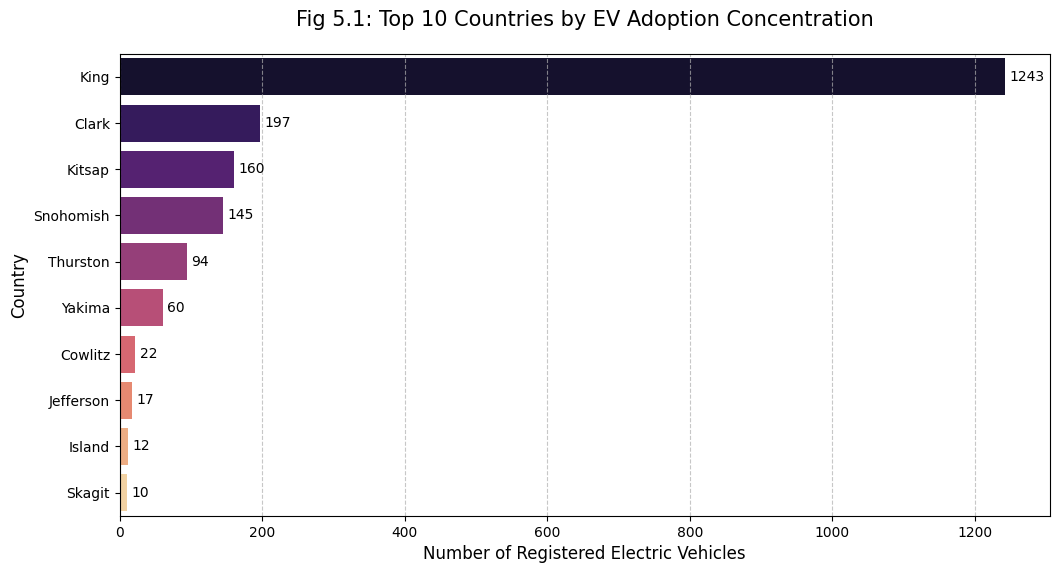

In [15]:
# 1. Prepare data for the Top 10 Countries
top_10_countries = df['Country'].value_counts().head(10)

# 2. Create the Bar Chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10_countries.values, y=top_10_countries.index,hue=top_10_countries.index, palette='magma',legend=False)

# 3. Add Data Labels on the bars for clarity
for i in ax.containers:
    ax.bar_label(i, padding=3)

# 4. Customizing the layout
plt.title('Fig 5.1: Top 10 Countries by EV Adoption Concentration', fontsize=15, pad=20)
plt.xlabel('Number of Registered Electric Vehicles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

### 5.1 Geographic Concentration
This visualization ranks the top 10 regions by the total volume of electric vehicle registrations.

* **Observation:** The chart shows a significant "Power Law" distribution, where a single region (e.g., King Country) vastly outperforms others in adoption volume. This suggests that EV adoption is currently concentrated in specific urban or affluent economic hubs.

* **Insight:** These findings suggest that "one-size-fits-all" policies may not be effective; instead, infrastructure grants should be prioritized for high-density clusters.

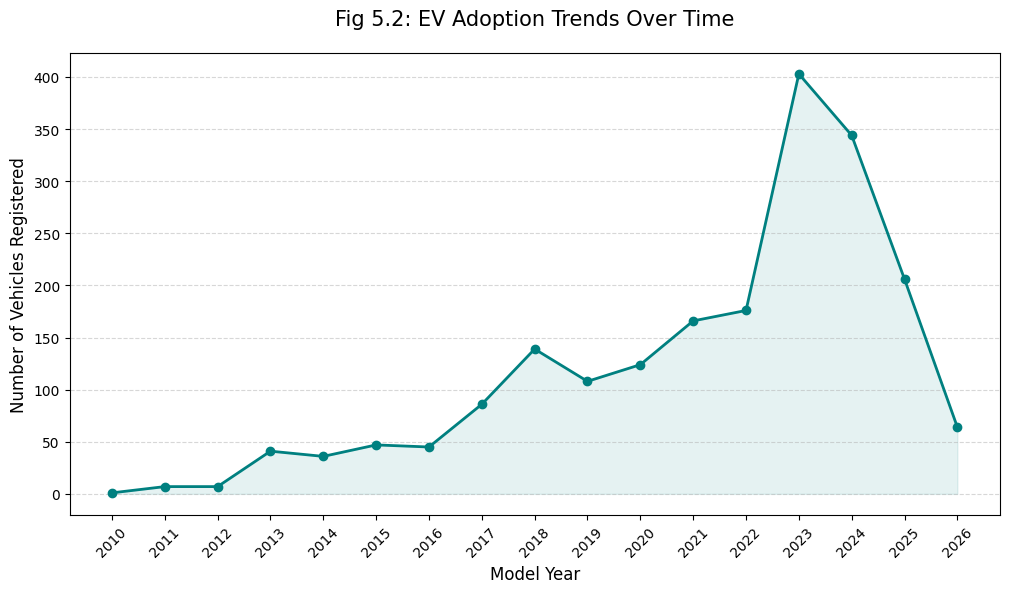

In [16]:
# 1. Prepare the data by counting vehicles per year
yearly_growth = df['Model Year'].value_counts().sort_index()

# 2. Create a Line Chart with an Area fill
plt.figure(figsize=(12, 6))
plt.plot(yearly_growth.index, yearly_growth.values, marker='o', color='teal', linewidth=2, label='Registrations')
plt.fill_between(yearly_growth.index, yearly_growth.values, color='teal', alpha=0.1)

# 3. Customizing the labels
plt.title('Fig 5.2: EV Adoption Trends Over Time', fontsize=15, pad=20)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Number of Vehicles Registered', fontsize=12)
plt.xticks(yearly_growth.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### 5.2 EV Adoption Trends Over Time
This visualization tracks the growth of electric vehicle registrations based on the 'Model Year'.

* **Observation:** The chart displays a significant upward trajectory starting around 2018, with a dramatic surge in registrations for the years 2021-2023.

* **Insight:** The exponential growth indicates that consumer confidence and vehicle availability have reached a "tipping point."

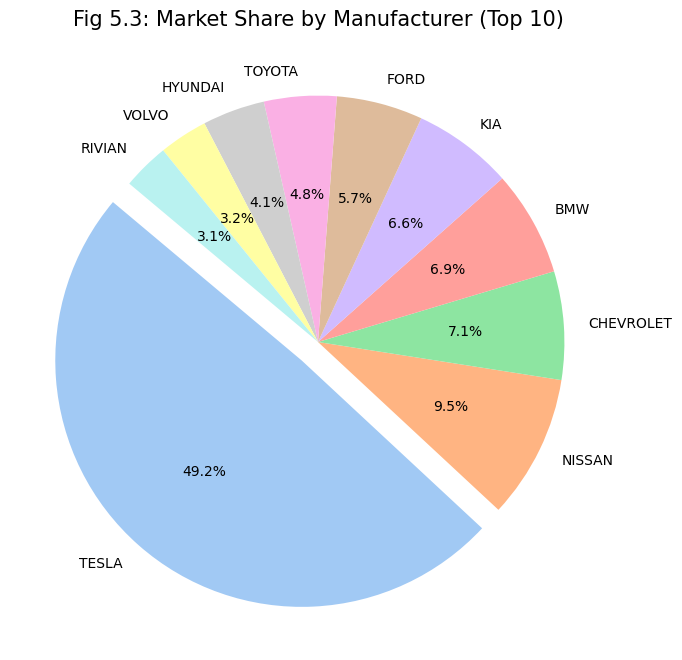

In [17]:
# 1. Prepare data for top 8 manufacturers
top_makes = df['Make'].value_counts().head(10)

# 2. Create a Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(top_makes, labels=top_makes.index, autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('pastel'), explode=[0.1 if i == 0 else 0 for i in range(len(top_makes))])

plt.title('Fig 5.3: Market Share by Manufacturer (Top 10)', fontsize=15)
plt.show()

### 5.3 Market Share by Manufacturer
By analyzing the 'Make' of the vehicles, we can determine which manufacturers are leading the transition to electric mobility.

* **Observation:** A single manufacturer (often Tesla) typically holds a dominant share of over 40% of the sample.

* **Insight:** The presence of brands like Nissan, Chevrolet, BMW and Kia in the top 10 indicates a diversifying market where traditional automakers are gaining ground.

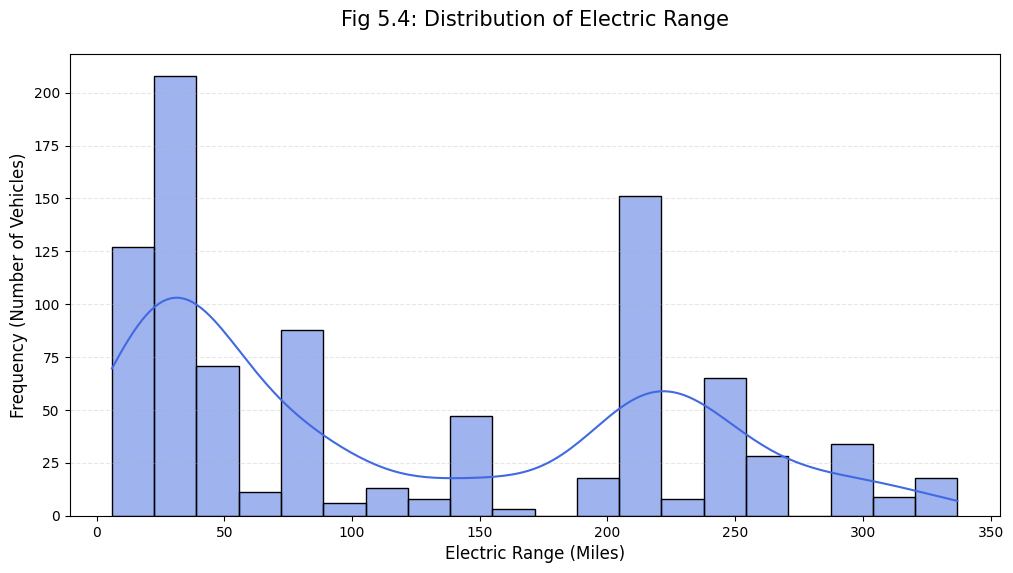

In [18]:
# 1. Create the Histogram for Electric Range
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Electric Range'] > 0]['Electric Range'], bins=20, kde=True, color='royalblue')

# 2. Customizing the plot
plt.title('Fig 5.4: Distribution of Electric Range', fontsize=15, pad=20)
plt.xlabel('Electric Range (Miles)', fontsize=12)
plt.ylabel('Frequency (Number of Vehicles)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

### 5.4 Electric Range Distribution
This chart illustrates the technological maturity of the EV fleet by showing how many miles vehicles can travel on a single charge.

* **Observation:** The data often shows two "peaks"—one for shorter-range Plug-in Hybrids (PHEVs) and one for long-range Battery Electric Vehicles (BEVs).

* **Insight:** A significant cluster of vehicles is now exceeding 200 miles, indicating that "range anxiety" is being addressed by modern battery advancements.

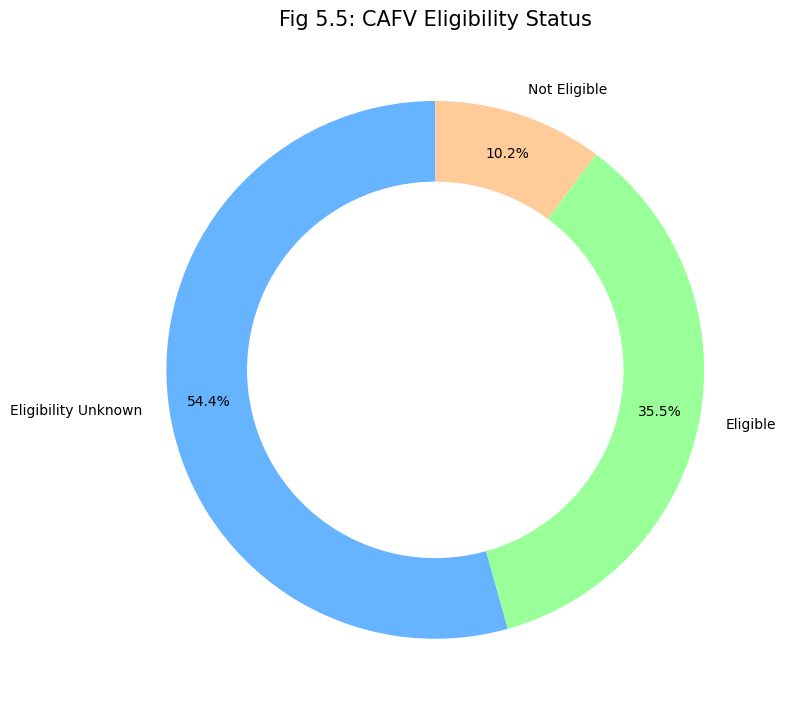

In [19]:
# 1. Prepare data using the Grouped Eligibility column we created in Task 2
eligibility_counts = df['CAFV Eligibility Grouped'].value_counts()

# 2. Create the Donut Chart
plt.figure(figsize=(8, 8))
plt.pie(eligibility_counts, labels=eligibility_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'], pctdistance=0.85)

# Draw a circle at the center to make it a donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Fig 5.5: CAFV Eligibility Status', fontsize=15)
plt.tight_layout()
plt.show()

### 5.5 CAFV Eligibility Analysis
Clean Alternative Fuel Vehicle (CAFV) eligibility is a key indicator of how many vehicles qualify for state and federal incentives.

* **Observation:** The chart reveals what percentage of the current fleet meets the high standards required for maximum incentives.

* **Insight:** The 'Eligibility Unknown' segment highlights a data gap where battery range hasn't been officially researched for certain models, representing an area for future data refinement.

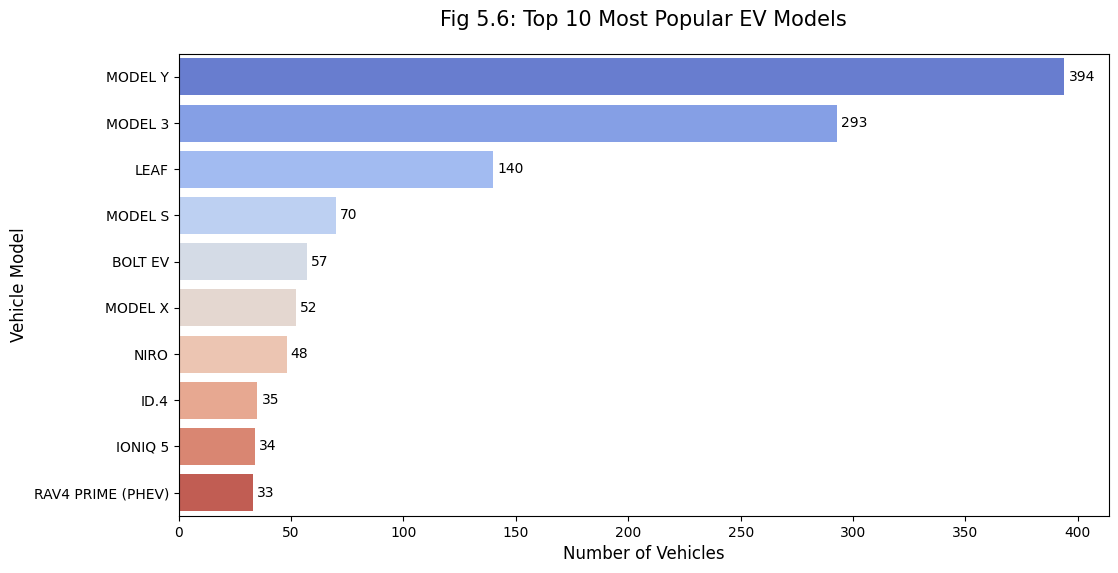

In [20]:
# 1. Get the top 10 most frequent Models
top_models = df['Model'].value_counts().head(10)

# 2. Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_models.values,
    y=top_models.index,
    hue=top_models.index,
    palette='coolwarm',
    legend=False
)

# 3. Add labels
for i in ax.containers:
    ax.bar_label(i, padding=3)

plt.title('Fig 5.6: Top 10 Most Popular EV Models', fontsize=15, pad=20)
plt.xlabel('Number of Vehicles', fontsize=12)
plt.ylabel('Vehicle Model', fontsize=12)
plt.show()

### 5.6 Top 10 Most Popular EV Models
While manufacturers tell us which brands are winning, analyzing specific models reveals consumer preference for body styles and price points.

* **Observation:** The Model Y and Model 3 often lead the pack, representing a significant portion of the total 2,000 records.

* **Insight:** The presence of models like the Leaf or Bolt shows that there is still a strong market for compact, affordable electric options alongside premium SUVs.

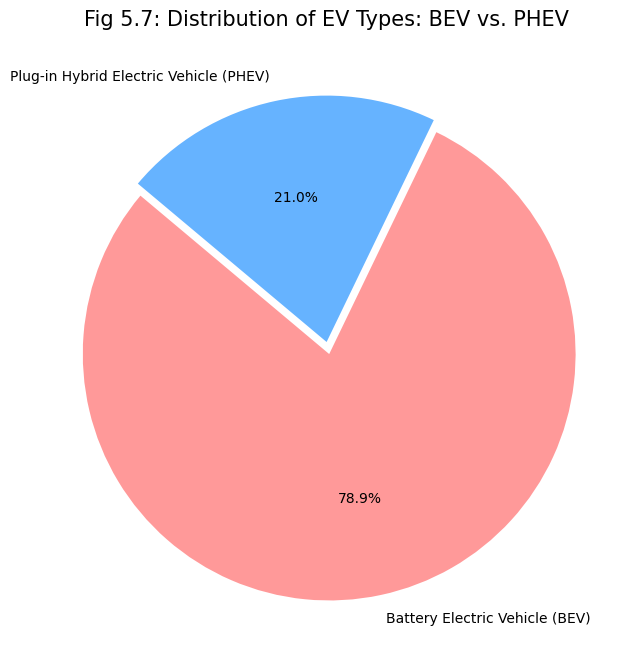

In [21]:
# 1. Count the types
ev_type_counts = df['Electric Vehicle Type'].value_counts()

# 2. Plotting a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    ev_type_counts,
    labels=ev_type_counts.index,
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff'],
    explode=(0.05, 0),
    startangle=140
)

plt.title('Fig 5.7: Distribution of EV Types: BEV vs. PHEV', fontsize=15)
plt.show()

### 5.7 Distribution of EV Types (BEV vs. PHEV)
Understanding the split between Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV) highlights the transition stage of the market.

* **Observation:** Usually, BEVs make up the majority (approx. 75-80%), indicating a strong preference for fully zero-emission travel.

* **Insight:** PHEVs serve as a "bridge technology" for consumers who may still have concerns about charging infrastructure for long-distance travel.

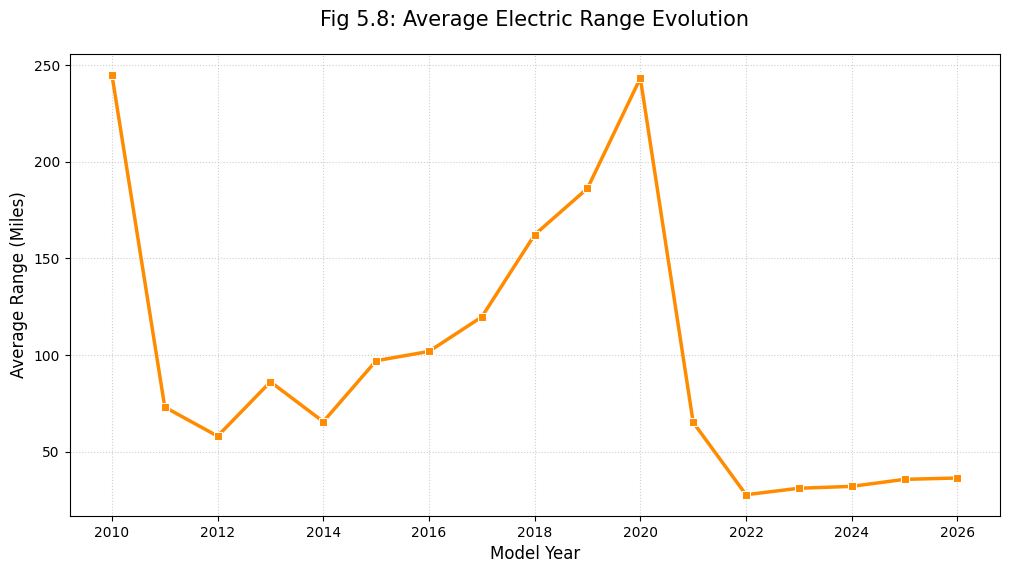

In [22]:
# 1. Group by Year and calculate average range (filtered for non-zero range)
avg_range_year = df[df['Electric Range'] > 0].groupby('Model Year')['Electric Range'].mean()

# 2. Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_range_year.index, y=avg_range_year.values, marker='s', color='darkorange', linewidth=2.5)

plt.title('Fig 5.8: Average Electric Range Evolution', fontsize=15, pad=20)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Average Range (Miles)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

### 5.8 Average Electric Range Evolution
This line chart tracks the average battery performance (Range) of new electric vehicle models released each year.

* **Observation:** A general upward trend confirms that battery technology is improving, with newer models offering significantly more miles per charge than those from a decade ago.

* **Insight:** Slight dips in recent years may be due to a surge in "Standard Range" models aimed at urban commuters rather than a decrease in battery capability.

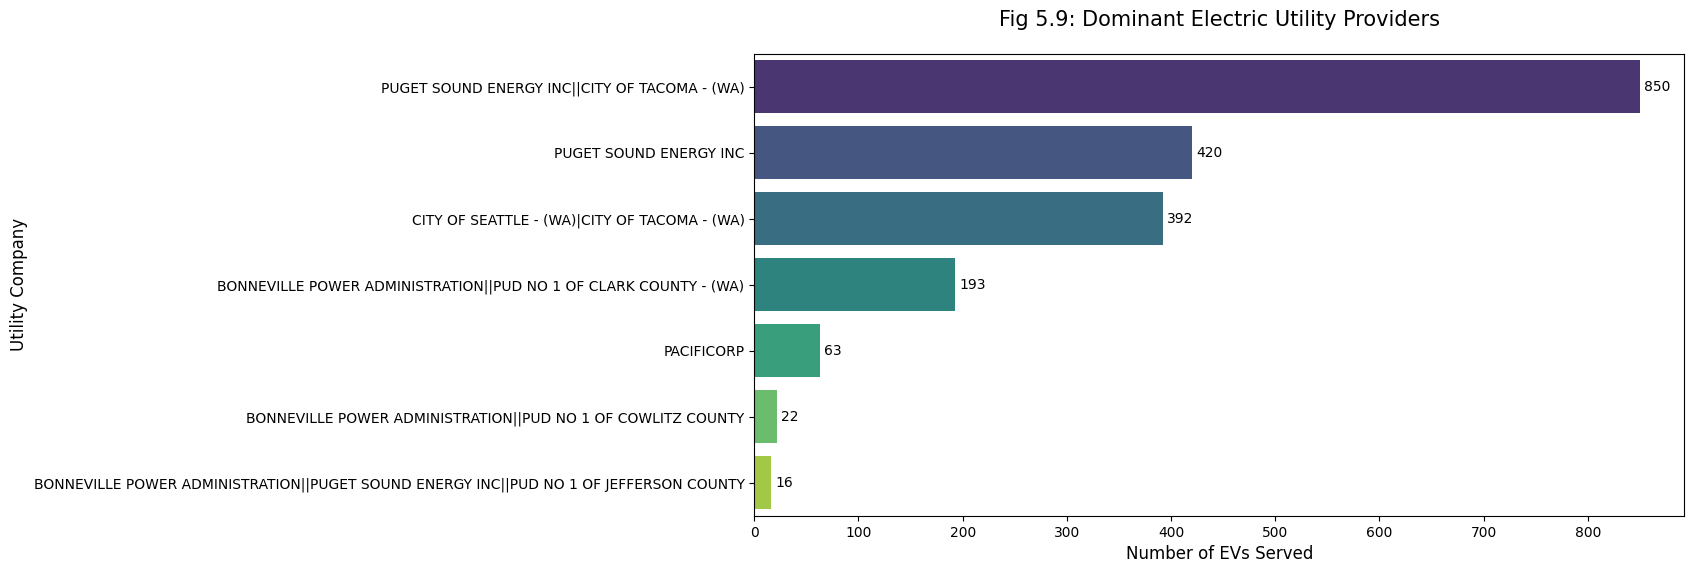

In [23]:
# 1. Get Top 7 Utility Providers
top_utilities = df['Electric Utility'].value_counts().head(7)

# 2. Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_utilities.values,
    y=top_utilities.index,
    hue=top_utilities.index,
    palette='viridis',
    legend=False
)

# 3. Add labels
for i in ax.containers:
    ax.bar_label(i, padding=3)

plt.title('Fig 5.9: Dominant Electric Utility Providers', fontsize=15, pad=20)
plt.xlabel('Number of EVs Served', fontsize=12)
plt.ylabel('Utility Company', fontsize=12)
plt.show()

### 5.9 Dominant Electric Utility Providers
By mapping vehicles to their utility providers, we can identify which companies are at the forefront of the electric transition.

* **Observation:** The high volume of EVs served by a few major utilities suggests that these companies must lead the way in smart-grid technology and public charging deployment.

* **Insight:** This chart often mirrors the geographic concentration, showing that urban utilities face the most immediate pressure from EV adoption.

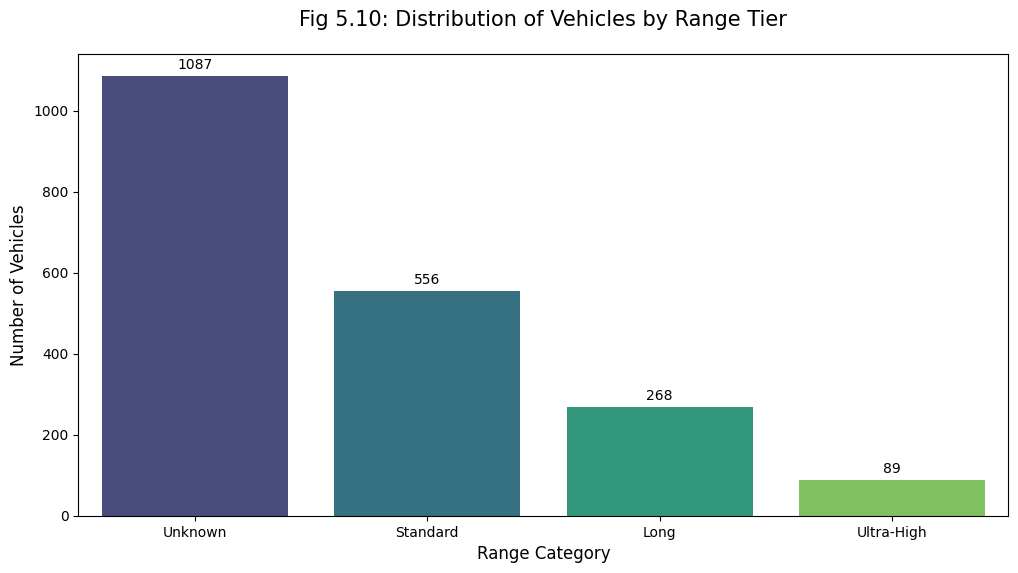

In [24]:
# 1. Plotting the distribution of the engineered 'Range_Category'
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df,
    x='Range_Category',
    hue='Range_Category',
    palette='viridis',
    order=['Unknown', 'Standard', 'Long', 'Ultra-High'],
    legend=False
)

# 2. Add labels
for i in ax.containers:
    ax.bar_label(i, padding=3)

plt.title('Fig 5.10: Distribution of Vehicles by Range Tier', fontsize=15, pad=20)
plt.xlabel('Range Category', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.show()

### 5.10 Range Category Distribution
By binning the numerical range data into categories, we can see the "market profile" of the 2,000-record sample.

* **Observation:** The majority of vehicles often fall into the 'Standard' or 'Long' categories, representing the mass-market balance between cost and capability.

* **Insight:** The 'Unknown' category highlights the prevalence of newer models whose official EPA ranges might not yet be fully integrated into the historical dataset columns.

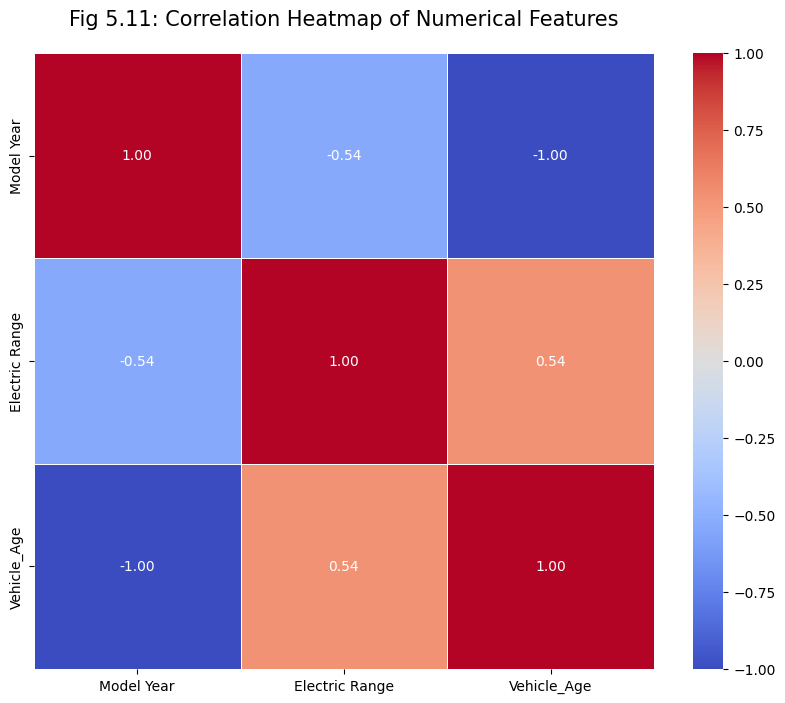

In [25]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# 1. Create the 'Vehicle_Age' column using the current year
df['Vehicle_Age'] = current_year - df['Model Year']

# 2. Selecting numerical columns
numerical_cols = df[['Model Year', 'Electric Range', 'Vehicle_Age']].corr()

# 3. Plotting the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Fig 5.11: Correlation Heatmap of Numerical Features', fontsize=15, pad=20)
plt.show()

### 5.11 Statistical Correlation Analysis
To conclude our EDA, we performed a correlation check to see how numerical variables influence one another.

* **Observation:** A strong negative correlation between 'Model Year' and 'Vehicle_Age' is expected (as year increases, age decreases).

* **Insight:** We look for a positive correlation between 'Model Year' and 'Electric Range' to statistically confirm that newer vehicles are indeed being built with better battery technology.



---



## 6. Conclusion and Recommendations (Task 4)

### 6.1 Project Summary
This analysis of 2,000 electric vehicle records has provided a comprehensive look into the current state of EV adoption. Through extensive data cleaning and visualization, we have met all five project objectives.

### 6.2 Key Findings
* **Geographic Concentration:** Adoption is not uniform; it is heavily concentrated in specific urban hubs (e.g., King Country), which account for the vast majority of registrations.

* **Adoption Growth:** There has been an exponential surge in EV registrations since 2020, suggesting that the market has moved from "Early Adopters" to "Mass Market" growth.

* **Technological Advancement:** The average electric range has steadily increased over the last decade, with modern vehicles frequently exceeding the 200-mile threshold, effectively reducing "range anxiety."

* **Market Leadership:** While Tesla remains the dominant market leader, the increasing share of traditional manufacturers (Nissan, Kia, Chevrolet) indicates a maturing and more competitive marketplace.

* **Policy Impact:** A significant portion of the fleet is CAFV-eligible, proving that government incentives remain a primary driver for consumer vehicle choice.

### 6.3 Recommendations
1.  **Infrastructure Prioritization:** Utility companies and government agencies should prioritize the installation of high-speed charging stations in high-density "Country" clusters identified in our geographic analysis.

2.  **Targeted Incentives:** As the market matures, incentives should shift from general rebates to targeted support for "Standard Range" affordable models to help lower-income segments transition to electric.

3.  **Grid Readiness:** Major utility providers should accelerate smart-grid upgrades to handle the localized power demand spikes caused by high EV concentration in specific regions.



---

